In [1]:
import numpy as np 
from uncertainties import ufloat, unumpy
import pandas as pd
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler   
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData

def gauss(x, A,mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

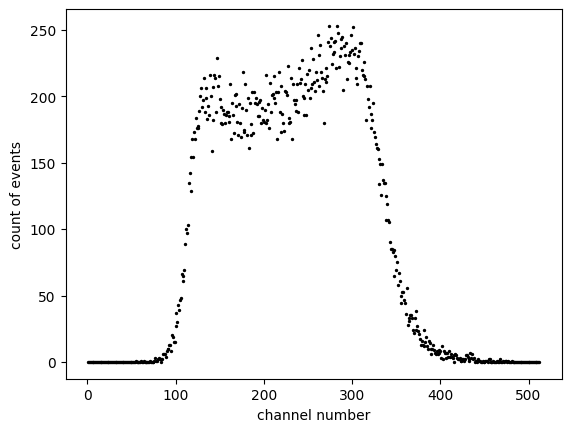

In [2]:
data=np.loadtxt('Daten/spectrum_with_cutoff_110.txt') #importiere Daten
channel, counts = np.hsplit(data,2)

plt.scatter(channel,counts,marker = "o", s=2, color="black")
plt.xlabel("channel number")
plt.ylabel("count of events")
plt.show()
#plot des vollen spektrums + cutoff bei etwa 110

In [3]:
#Zeitkalibrierung



In [4]:
channel = np.zeros((9,512))
counts = np.zeros((9,512))
sigma = 5 * np.ones((9,512)) #wir nehmen einen fehler von +-4 kanälen an 
data=np.loadtxt('Daten/spectrum_with_cutoff_55_0ns.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[0] = temp1.flatten()
counts[0] =temp2.flatten()

data=np.loadtxt('Daten/spectrum_with_cutoff_55_4ns.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[1], counts[1] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/spectrum_with_cutoff_55_8ns.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[2], counts[2] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/spectrum_with_cutoff_55_12ns.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[3], counts[3] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/spectrum_with_cutoff_55_16ns.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[4], counts[4] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/spectrum_with_cutoff_55_20ns.txt') #importiere Daten
temp1, temp2 = np.hsplit(data,2)
channel[5], counts[5] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/spectrum_with_cutoff_55_24ns.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[6], counts[6] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/spectrum_with_cutoff_55_28ns.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[7], counts[7] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/spectrum_with_cutoff_55_32ns.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[8], counts[8] = temp1.flatten(), temp2.flatten()

p_0 = [[193,68,1],[124,117,1],[127,168,1],[93,216,1],[109,269,1],[91,318,1],[134,371,1],[133,422,1],[155,470,1]]
popt = np.zeros((9,3))
pcov = np.zeros((9,3,3))
for i in range(9):
    popt[i],pcov[i] = curve_fit(gauss,channel[i,50*i:50*i+100],counts[i,50*i:50*i+100],p0=p_0[i],sigma = sigma[i,50*i:50*i+100], absolute_sigma = True)
    #print("means:", popt,"\n","uncertainties: ", np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), np.sqrt(pcov[2][2]))
    #plt.plot(channel[i],gauss(channel[i],*popt[i]),color="orange",label="Angepasste Gaussverteilung")
    #plt.scatter(channel[i],counts[i],marker = 'o', s=2,label="Messwerte",color="black")
    #plt.legend()
    #plt.grid()
    #plt.show()
#print("means: \n", popt,"\n cov: \n",pcov)

mu = popt[:,1]

mu_unc = np.sqrt(pcov[:,1][:,1])
#print("\n",mu,"\n", mu_unc)
sigma = popt[:,2]
sigma_unc = np.sqrt(pcov[:,2][:,2])
fwhm = 2*np.sqrt(2*np.log(2))*sigma
fwhm_unc = 2*np.sqrt(2*np.log(2))*sigma_unc

delay = np.array([0,4,8,12,16,20,24,28,32])


def linearTime(x,a,b):
    return a*x  + b

popt,pcov = curve_fit(linearTime, mu, delay,sigma = mu_unc, absolute_sigma = True)
#plt.scatter(delay,mu,)
#plt.scatter(delay,linearTime(delay,*popt))
#print(popt,"\n", np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]))
a = popt[0]
a_unc = np.sqrt(pcov[0,0])

#print(a,a_unc)
#-> t = 0.693(+-0.256)*channel -5.382(+-0.022) in ns

delta_t = a * fwhm
delta_t_unc = np.sqrt((fwhm*a_unc)**2+(a*fwhm_unc)**2)
# Hier: gewichteter mittelwert und die unsicherheit des gewichteten mittelwerts. 
delta_t_wmean = np.sum(delta_t*1/delta_t_unc**2)/np.sum(1/delta_t_unc**2)
delta_t_wmean_unc = np.sqrt(np.sum((delta_t*1/delta_t_unc**2)**2))/np.sum(1/delta_t_unc**2)
print(delta_t_wmean, delta_t_wmean_unc) #<- Das ist die Zeitauflösung! Damit begründen wir, das manche zerfallsprozesse nicht getrennt werden können

a = ufloat(a,a_unc)
b = ufloat(popt[1],np.sqrt(pcov[1,1]))

0.693700313223989 0.25620194704116195


In [5]:
# Lichtgeschwindigkeit

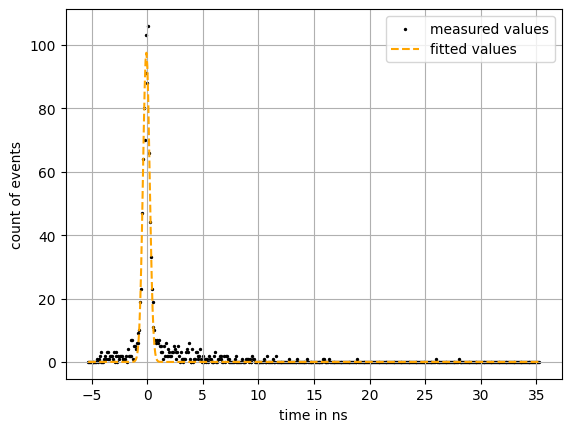

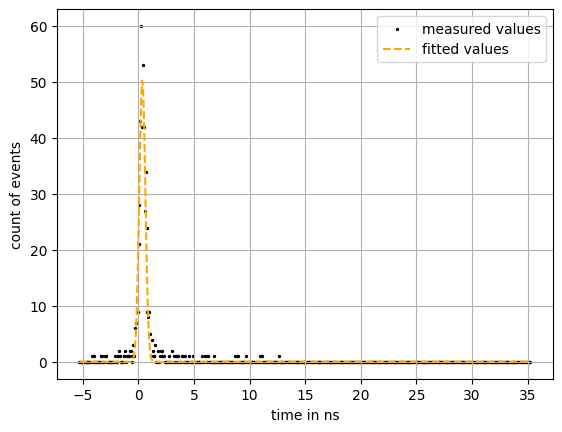

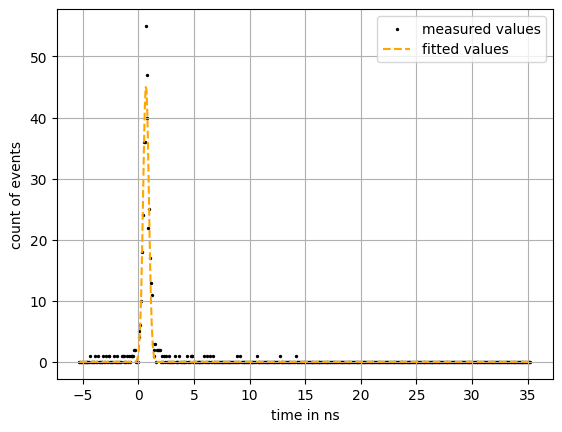

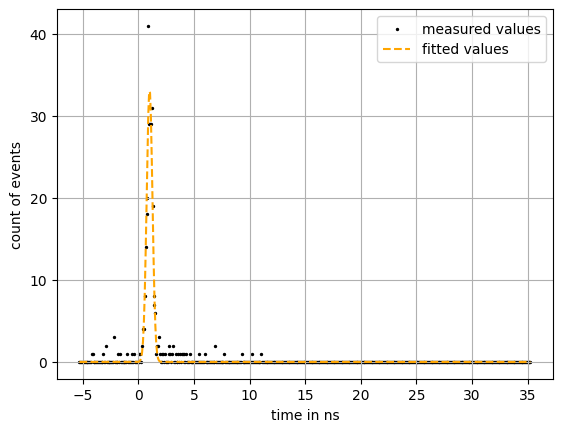

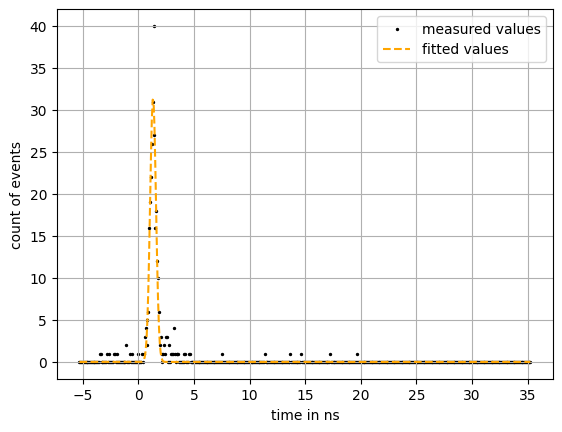

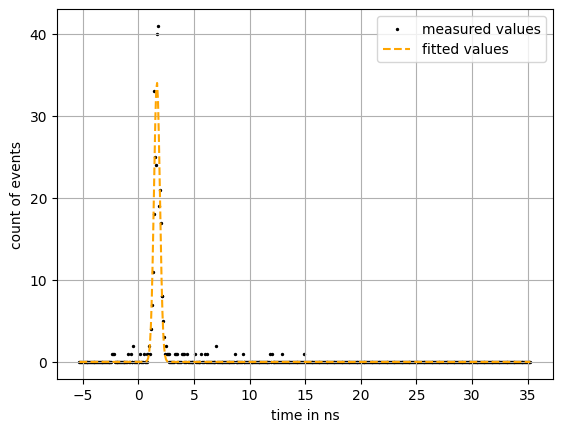

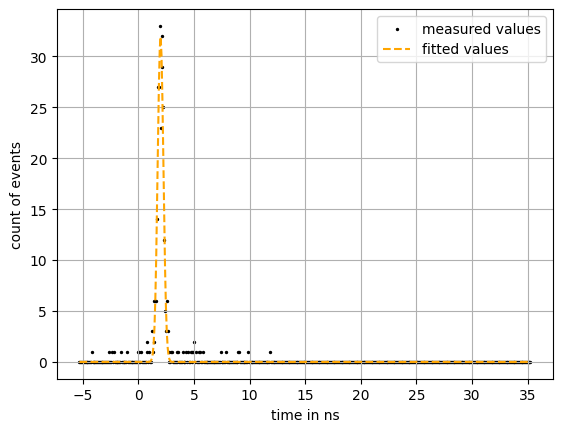

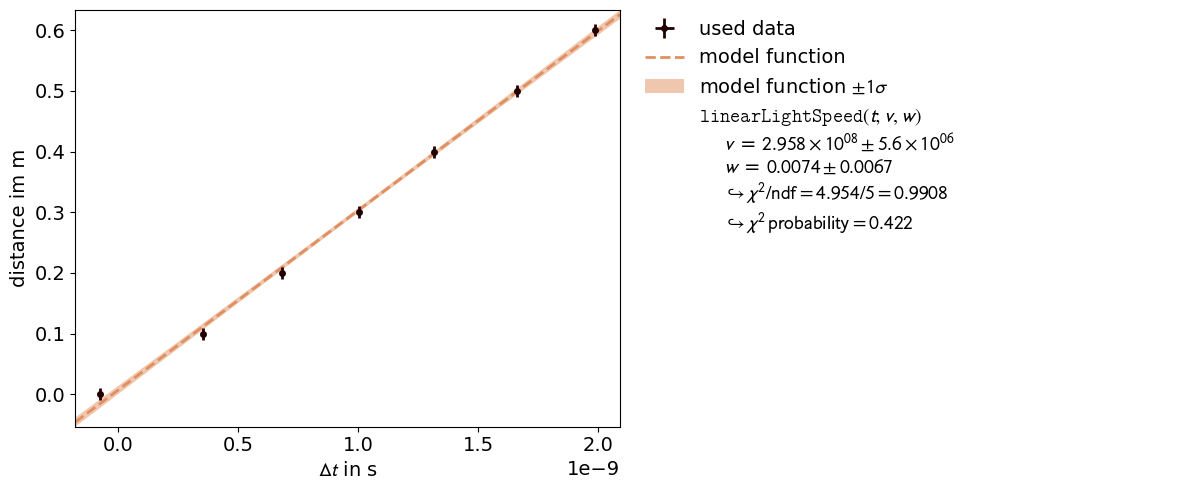

In [6]:
channel = np.zeros((7,512))
counts = np.zeros((7,512))


data=np.loadtxt('Daten/light0cm.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[0] = temp1.flatten()
counts[0] =temp2.flatten()

data=np.loadtxt('Daten/light10cm.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[1], counts[1] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/light20cm.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[2], counts[2] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/light30cm.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[3], counts[3] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/light40cm.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[4], counts[4] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/light50cm.txt') #importiere Daten
temp1, temp2 = np.hsplit(data,2)
channel[5], counts[5] = temp1.flatten(), temp2.flatten()

data=np.loadtxt('Daten/light60cm.txt') #importiere Daten
temp1, temp2  = np.hsplit(data,2)
channel[6], counts[6] = temp1.flatten(), temp2.flatten()


t = a * channel + b
t_nom = unumpy.nominal_values(t)
t_std = unumpy.std_devs(t)
popt = np.zeros((7,3))
pcov = np.zeros((7,3,3))
for i in range(7):
    plt.scatter(t_nom[i],counts[i],marker = 'o', s=2,color="black", label= "measured values")
    popt[i],pcov[i] = curve_fit(gauss,t_nom[i],counts[i],sigma = t_std[i], absolute_sigma = True)
    plt.plot(t_nom[i],gauss(t_nom[i],*popt[i]),color="orange", label="fitted values",linestyle="--")
    plt.legend()
    plt.grid()
    plt.xlabel("time in ns")
    plt.ylabel("count of events")
    plt.show()
mu = popt[:,1]

mu_unc = np.sqrt(pcov[:,1][:,1])
#print(mu)
mu = unumpy.uarray(mu,mu_unc)*10**-9
d = [0,0.10,0.20,0.30,0.40,0.50,0.60]
def linearLightSpeed(t,v,w):
    return v*t + w 

xy_data = XYContainer(unumpy.nominal_values(mu).flatten(),d)
x_error = unumpy.std_devs(mu)
y_error = 0.01
line_fit=Fit(data=xy_data,model_function=linearLightSpeed)
line_fit.add_error(axis='x', err_val=x_error.flatten(),relative=False)  # add the x-error to the fit
line_fit.add_error(axis='y', err_val=y_error,relative=False)

line_fit.do_fit()

line_fit.data_container.label = "used data"
line_fit.model_label = "model function"

line_fit.data_container.axis_labels = ['$\Delta t$ in s','distance im m']
plot = Plot(fit_objects= line_fit)
plot.plot()
plt.show()


#->2.958 e^8 +- 5.6e^6 = c, Lichtgeschwindigkeit! litwert : 2.998e8, liegt im unsicherheitsbereich

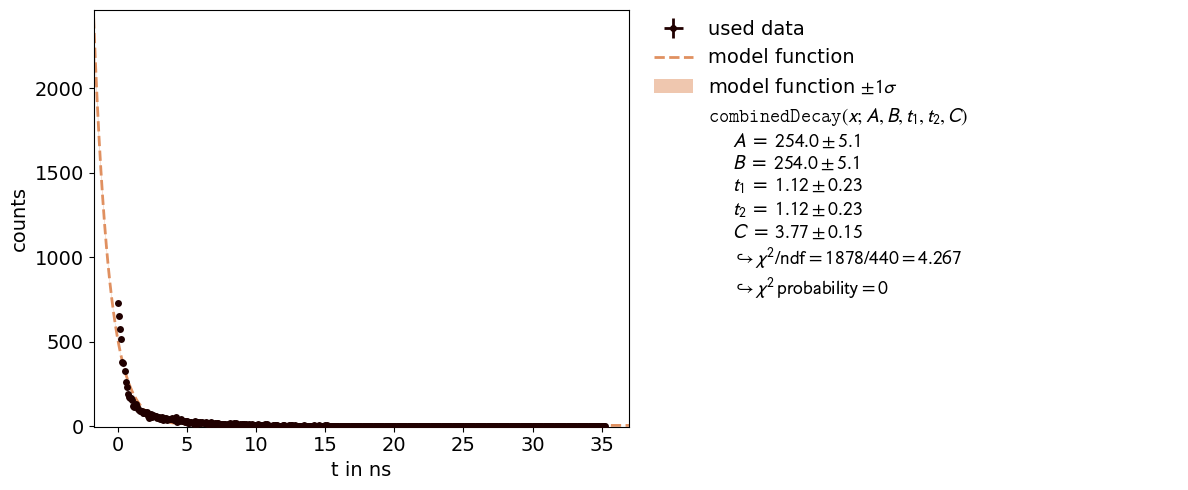

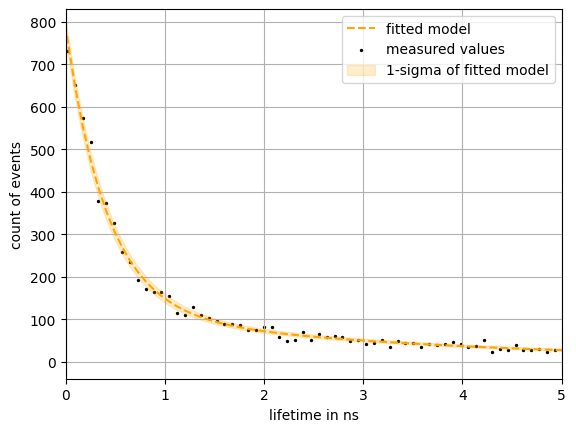

In [8]:
#lebenszeit

data=np.loadtxt('Daten/lifetime_spectrum.txt') #importiere Daten
channel, counts  = np.hsplit(data,2)
#alles vor dem peak wird ignoriert.
channel = channel[67:]

t = (a*channel+b)
#plt.plot(channel,unumpy.nominal_values(t))
counts = counts[67:]
#plt.scatter(channel,counts,marker="o",s=2,color="black")

def combinedDecay(x,A,B,t_1,t_2,C):
    return A*np.exp(-x/t_1)+B*np.exp(-x/t_2)+C


xy_data = XYContainer(unumpy.nominal_values(t).flatten(),unumpy.nominal_values(counts).flatten())
x_error = unumpy.std_devs(t)
y_error = 4
line_fit=Fit(data=xy_data,model_function=combinedDecay)
line_fit.add_error(axis='x', err_val=x_error.flatten(),relative=False)  # add the x-error to the fit
line_fit.add_error(axis='y', err_val=y_error,relative=False)

line_fit.do_fit()

line_fit.data_container.label = "used data"
line_fit.model_label = "model function"

line_fit.data_container.axis_labels = ['t in ns','counts']
plot = Plot(fit_objects= line_fit)
plot.plot()
plt.show()

A=121
B=667
t_1=3.36
t_2= 0.412
C=0.22

plt.plot(unumpy.nominal_values(t),combinedDecay(unumpy.nominal_values(t),A,B,t_1,t_2,C),color="orange",label="fitted model",linestyle="--")
plt.scatter(unumpy.nominal_values(t),counts,marker="o",s=2,color="black", label ="measured values")
plt.fill_between(unumpy.nominal_values(t).flatten(),combinedDecay(unumpy.nominal_values(t).flatten(),A+4.2,B+19,t_1+0.11,t_2+0.012,C+0.26),combinedDecay(unumpy.nominal_values(t).flatten(),A-4.2,B-19,t_1-0.11,t_2-0.012,C-0.26),label = "1-sigma of fitted model", color = "orange",alpha=0.2)
plt.xlim(0,5)
plt.legend()
plt.xlabel("lifetime in ns")
plt.ylabel("count of events")
plt.grid()
plt.show()